# Challenge N°1: pre-procesamiento de datos

In [ ]:
# Importamos las librerías que necesitaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargamos el dataset seleccionado
db = pd.read_csv('cancer_challenge_cl2.csv')
db = db.drop(db.columns[0], axis=1)

## Pre-procesamiento del dataset

In [ ]:
# Buscamos si existen entradas vacías en el dataset
print(db.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              3
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    1
target                     0
dtype: int64


In [ ]:
# Evaluamos el tipo de dato de cada columna del dataframe
names = db.keys()
print(names)
names = list(names)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


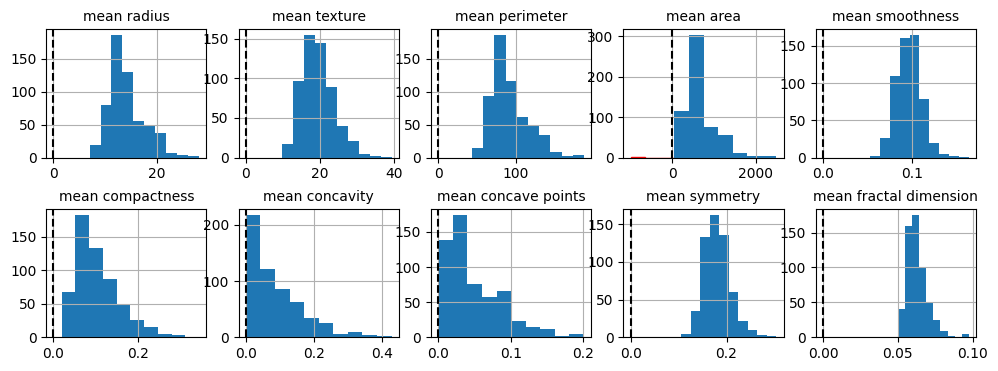

In [ ]:
# Observamos la distribución de valores con histogramas
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (12,4))
plt.subplots_adjust(hspace=0.4)

for key, ax in zip(names[:10], axs.ravel()):
  db[key].hist(ax = ax)
  ax.set_title(key,  wrap = True, fontsize = 10)
  ax.axvline(x = 0, color = 'black', linestyle = '--')

  # Las 10 primeras mediciones corresponden a variables físicas que no deberían ser negativas ni nulas (== 0)
  for bar in ax.containers[0]:
    x = bar.get_x() + 0.5 * bar.get_width()
    if x < 0:
      bar.set_color('red') # de rojo si existen valores que no corresponden

plt.show()

In [ ]:
# Observamos que la columna 'mean area' tiene valores negativos
db.loc[db['mean area'] < 0, ['mean area']] = np.nan

# Además, la columna 'target' debe tener solo como valores 0 y 1
db.loc[db['target'] > 1, ['target']] = np.nan

In [ ]:
# Observamos cuántos datos tenemos antes de filtrar el dataset
print(np.shape(db))

(569, 31)


In [ ]:
# Eliminamos las filas que presenten valores Nan
db = db.dropna()

# y evaluamos cuántos datos tenemos después de filtrar
print(np.shape(db))

(563, 31)


In [ ]:
# Para comprobar
# print(db.isnull().sum())

In [ ]:
# Normalizamos los features
y = db.target
features = db.drop(db.columns[-1] , axis = 1, inplace = False)
stdX = (features - features.mean()) / (features.std())              
data = pd.concat([y,stdX.iloc[:,:]], axis=1)

## Visualizando el dataset

In [ ]:
# Para ver la distribución estadística de los datos
# data.info()

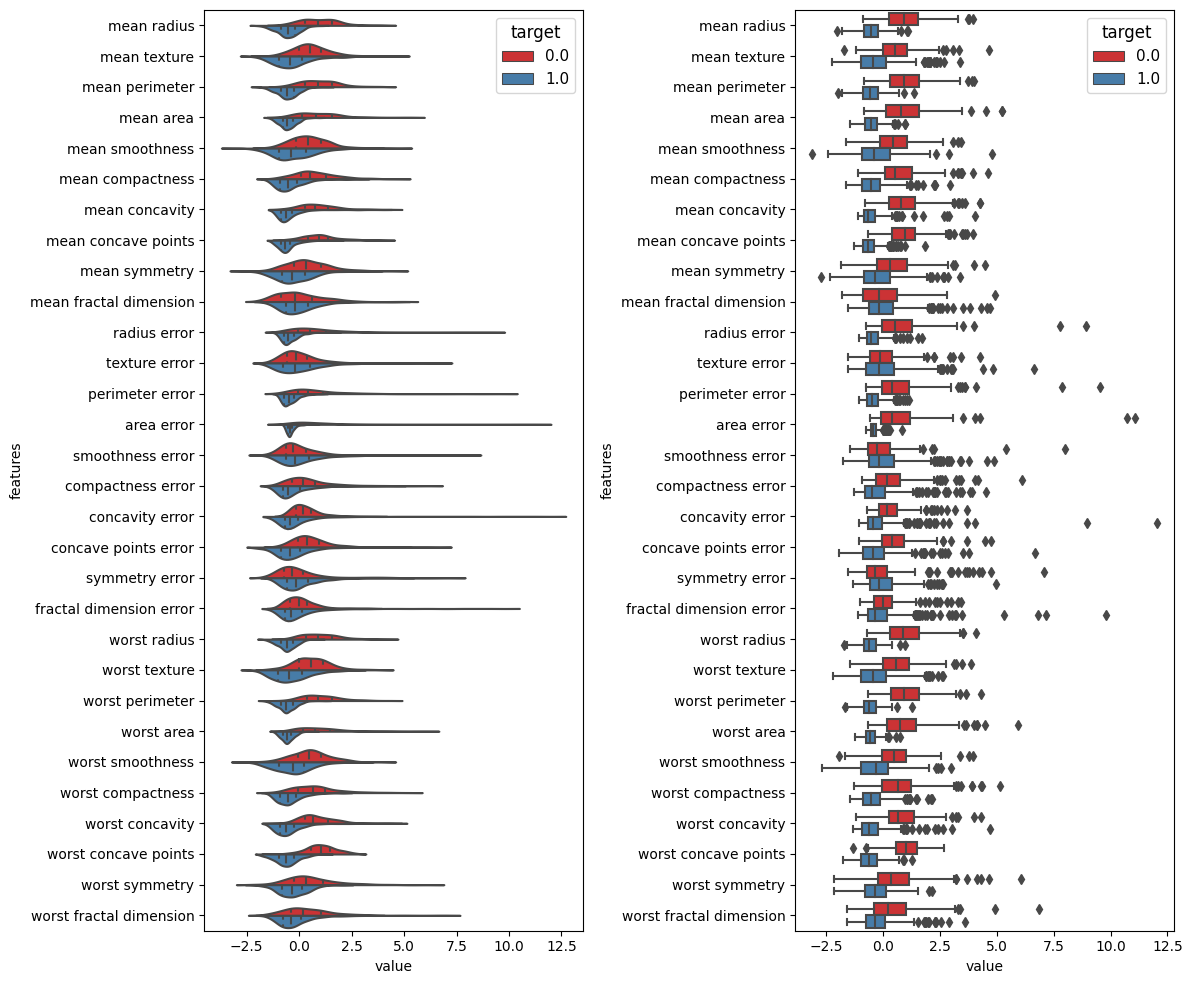

In [ ]:
# Realizamos un violin plot y un box plot (seaborn) en búsqueda de outliers
data_plot = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')

fig, axs = plt.subplots(1, 2, figsize = (12,10))
sns.set_context('notebook', font_scale=1.0)

sns.violinplot(x="value", y="features", hue="target", data=data_plot,split=True, 
               inner="quart", palette='Set1', ax = axs[0])

sns.boxplot(x="value", y="features", hue="target", data=data_plot,
            palette='Set1', ax = axs[1])

fig.tight_layout()

In [ ]:
# Obtenemos los índices de los datos outliers
print(np.shape(data))
outliers = np.where((data['radius error'] > 7.5) | (data['texture error'] > 3.0) |
                    (data['perimeter error'] > 7.5) | (data['area error'] > 5.0) |
                    (data['area error'] > 5.0) | (data['smoothness error'] > 5.0) |
                    (data['concavity error'] > 7.5) | (data['fractal dimension error'] > 5.0))
outliers = list(outliers)

(563, 31)


In [ ]:
# Eliminamos los datos outliers 
data = data.drop(outliers[0])
print(np.shape(data))

(547, 31)


In [ ]:
# Adicionalmente, podemos utilizar un pairplot para evaluar potenciales features para un clasificador
#plt.figure(figsize = (5,5))
#vec = pd.concat([y, stdX.iloc[:,:10]], axis = 1)
#sns.pairplot(data=vec, hue='target')
#plt.show()

## Modelos de clasificación utilizando Lazypredict

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.target, test_size=.25, random_state = 42)

In [ ]:
!pip install -q lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:05<00:00,  5.76it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.98,0.98,0.98,0.98,0.06
RandomForestClassifier,0.97,0.97,0.97,0.97,0.57
LogisticRegression,0.97,0.96,0.96,0.97,0.05
KNeighborsClassifier,0.97,0.96,0.96,0.97,0.02
BernoulliNB,0.96,0.96,0.96,0.96,0.02
XGBClassifier,0.96,0.96,0.96,0.96,1.87
AdaBoostClassifier,0.96,0.96,0.96,0.96,0.18
ExtraTreesClassifier,0.96,0.96,0.96,0.96,0.15
Perceptron,0.96,0.96,0.96,0.96,0.02
